## Data Science for Product Manager - Final Report Code

### Date : 3/4/2022
### Member : Ed Hyungil Kim, Rachel Yingtong Lei, Camilo Garcia, and Chiara Marchese
### Topic : Survery Analysis


### Q. What does the data look like ? (Data Preparation)

In [3]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# load data
data=  pd.read_excel("DDS11_Data_Extract_with_labels.xlsx")
data.head(2)

,record - Record number,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,QNEW1 - Do you have children living in your home (excluding yourself if you are under 18)?,QNEW2 - How old are the children in your home?-0-4 years,...,"Q39rNEW1 - I would rather pay for sports information online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, c","Q39rNEW2 - I would rather pay for games online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW3 - I would rather pay for music online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39rNEW4 - I would rather pay for TV shows online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A","Q39rNEW5 - I would rather pay for movies online in exchange for not being exposed to advertisements. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, choose ""N/A.""","Q39r2 - I would be willing to provide more personal information online if that meant I could receive advertising more targeted to my needs and interests. - Using the scale below, please indicate how much you agree or disagree with the following statements.","Q39r3 - By providing more personal information online, I am worried about becoming a victim of identity theft. - Using the scale below, please indicate how much you agree or disagree with the following statements. If the question does not apply to you, cho","Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit",Q89 - Which of the following is your most frequently used mechanism to get news?,FINAL WEIGHTS
0,4.0,36.0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,No,...,Agree strongly,Agree somewhat,Agree somewhat,Agree strongly,Agree strongly,Agree strongly,Agree somewhat,Agree strongly,Magazine,0.083025
1,6.0,26.0,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),Yes,Yes,...,Agree somewhat,Agree somewhat,Disagree somewhat,Disagree somewhat,Disagree somewhat,Agree somewhat,Disagree somewhat,Disagree somewhat,Print newspapers,0.104475


In [5]:
# select key feature for analysis 
feature_indexs = [1,2,3,4,5,6,7,16,133,195]
df = data.iloc[:,feature_indexs]
df.head(2)

,"Q1r1 - To begin, what is your age?",Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q26 - Which of the following subscriptions does your household purchase?-Streaming video service,"Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit"
0,36.0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",No,Agree strongly
1,26.0,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",Yes,Disagree somewhat


In [6]:
# drop the exact age data, but use age-group to make user grouping easily
df=df.drop('Q1r1 - To begin, what is your age?', axis=1)
df.head(2)

,Q4 - What is your gender?,age - you are...,Q2 - In which state do you currently reside?,region - Region,QNEW3 - What is your employment status?,Q5 - Which category best describes your ethnicity?,"Q6 - Into which of the following categories does your total annual household income fall before taxes? Again, we promise to keep this, and all your answers, completely confidential.",Q26 - Which of the following subscriptions does your household purchase?-Streaming video service,"Q39r4 - I would be willing to view advertising with my streaming video programming if it significantly reduced the cost of the subscription.(e.g., reduced subscription cost by 25%) - Using the scale below, please indicate how much you agree or disagree wit"
0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",No,Agree strongly
1,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",Yes,Disagree somewhat


In [7]:
# process column headers
new_columns = []
for c in df.columns:
    temp = c.split(" - ")
    new_columns.append(temp[0])
df.columns = new_columns
df.head(2)

,Q4,age,Q2,region,QNEW3,Q5,Q6,Q26,Q39r4
0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",No,Agree strongly
1,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",Yes,Disagree somewhat


In [8]:
# renaming columns
df.columns = ['gender','age_range','state','region','employment','race','income','streaming_use','willingness_for_ads']
df.head(2)

,gender,age_range,state,region,employment,race,income,streaming_use,willingness_for_ads
0,Male,34-50,Georgia,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",No,Agree strongly
1,Female,20-26,New York,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",Yes,Disagree somewhat


#### Check data statistics

In [9]:
# check dataframe data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2131 entries, 0 to 2130
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   gender               2131 non-null   object
 1   age_range            2131 non-null   object
 2   state                2131 non-null   object
 3   region               2131 non-null   object
 4   employment           2131 non-null   object
 5   race                 2131 non-null   object
 6   income               2131 non-null   object
 7   streaming_use        2131 non-null   object
 8   willingness_for_ads  2131 non-null   object
dtypes: object(9)
memory usage: 150.0+ KB


* All data set is categorical data

In [10]:
# check statistics for each columns
df.describe().transpose()

,count,unique,top,freq
gender,2131,2,Female,1070
age_range,2131,6,70 or older,423
state,2131,51,California,264
region,2131,4,South,787
employment,2131,5,Employed full-time or part-time,911
race,2131,10,White or Caucasian (Non-Hispanic),1464
income,2131,6,"$50,000 to $99,999",737
streaming_use,2131,2,No,1160
willingness_for_ads,2131,5,Agree somewhat,718


* Instead of state, we use region only
* We will check columns distributions

In [11]:
df = df.drop('state',axis=1)

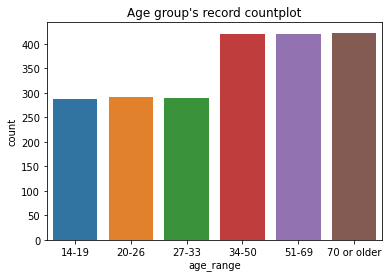

In [12]:
# each age range's records
_  = sns.countplot(x='age_range',order=['14-19','20-26','27-33','34-50','51-69','70 or older'],data=df)
plt.title("Age group's record countplot")
plt.show()

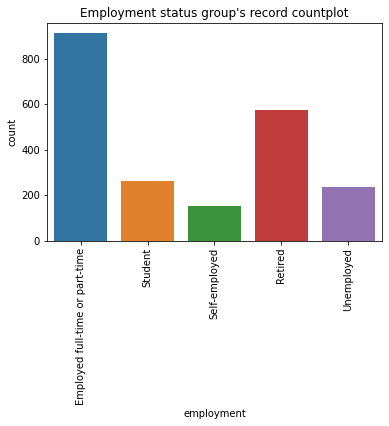

In [13]:
# each employment status's records
_  = sns.countplot(x='employment',data=df)
_ = plt.xticks(rotation = 90)
plt.title("Employment status group's record countplot")
plt.show()

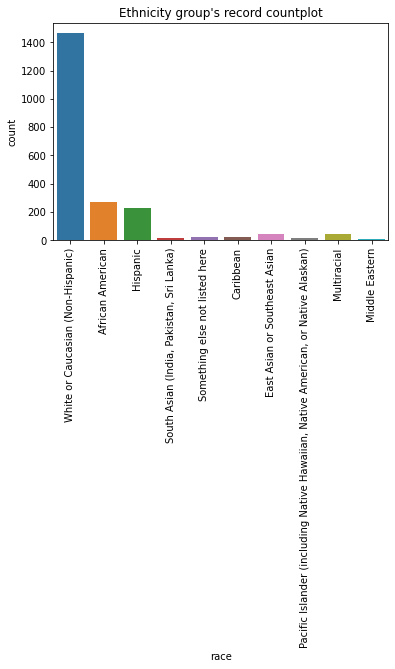

In [14]:
# ethinicity group record
_  = sns.countplot(x='race',data=df)
_ = plt.xticks(rotation = 90)
plt.title("Ethnicity group's record countplot")
plt.show()

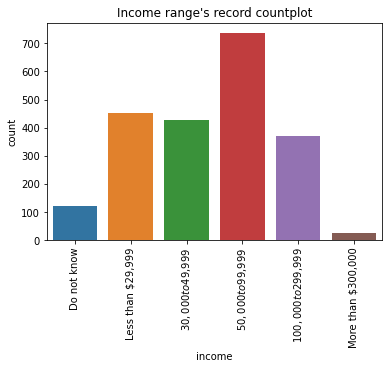

In [15]:
# income range records
_  = sns.countplot(x='income',order=['Do not know','Less than $29,999','$30,000 to $49,999',\
                                    '$50,000 to $99,999','$100,000 to $299,999','More than $300,000'] ,data=df)
_ = plt.xticks(rotation = 90)
plt.title("Income range's record countplot")
plt.show()

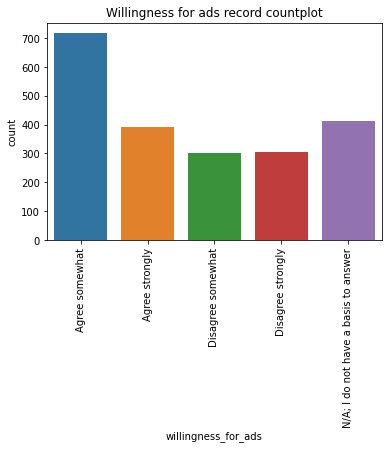

In [16]:
# outcome variable records (willingess for free Ads with price discount)
_  = sns.countplot(x='willingness_for_ads',order=sorted(list(df['willingness_for_ads'].unique())),data=df)
_ = plt.xticks(rotation = 90)
plt.title("Willingness for ads record countplot")
plt.show()

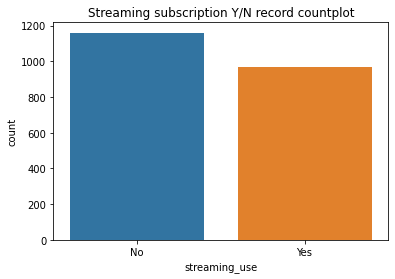

In [17]:
# outcome variable records (streaming service subscription Y or N)
_  = sns.countplot(x='streaming_use',data=df)
plt.title("Streaming subscription Y/N record countplot")
plt.show()

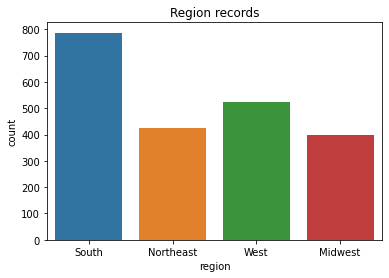

In [18]:
# Region records
_ = sns.countplot(x='region', data=df)
plt.title("Region records")
plt.show()

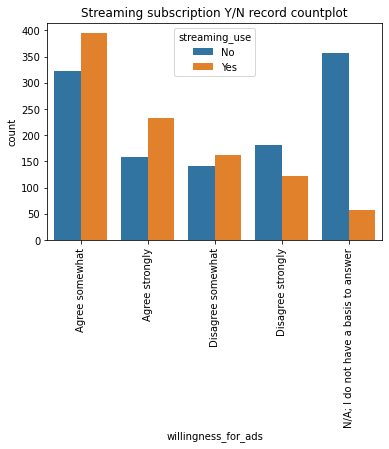

In [19]:
# Streaming service and willingess for ads records
_ = sns.countplot(x='willingness_for_ads',order=sorted(list(df['willingness_for_ads'].unique())),\
                                            hue='streaming_use',data=df)
plt.title("Streaming subscription Y/N record countplot")
plt.xticks(rotation=90)
plt.show()

### Q. How was the data prepared for modeling? (Data processing)


In [20]:
### make willingness for free ads columns as binary category data

# label the outcome feature 
# Remapping y value to Y/N
# change willi
def transformWillingness(x):
    if x=="Agree strongly" or x=="Agree somewhat":
        return "Yes"
    elif x=="Disagree somewhat" or x=="Disagree strongly":
        return "No"
    else:
        return "No"
df['willingness_for_ads_new'] = df['willingness_for_ads'].apply(lambda x: transformWillingness(x))
df.head(3)

,gender,age_range,region,employment,race,income,streaming_use,willingness_for_ads,willingness_for_ads_new
0,Male,34-50,South,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",No,Agree strongly,Yes
1,Female,20-26,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"$50,000 to $99,999",Yes,Disagree somewhat,No
2,Female,27-33,Northeast,Employed full-time or part-time,White or Caucasian (Non-Hispanic),"Less than $29,999",No,Agree strongly,Yes


Q. What modeling approach did you use?

1. Use random forest model to specify which category has significant impact on outcome variables
2. Select key features based on business strategy with various feature combination
3. Evaluate decision tree model on these feature sets
4. Select the model which can meaningful user group

In [21]:
# firstly, build a model for willingness for ads
X = df.drop(['streaming_use','willingness_for_ads','willingness_for_ads_new'],axis=1)
y = df['willingness_for_ads_new']

In [22]:
# train, test data split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

In [23]:
# processing one hot encoding for categorical data
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False,handle_unknown="ignore")
X_train_prepared = ohe.fit_transform(X_train)
X_test_prepared = ohe.transform(X_test)

In [24]:
# ohe feature names
ohe.get_feature_names()

C:\Users\nangman\Anaconda3\envs\DFP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Female', 'x0_Male', 'x1_14-19', 'x1_20-26', 'x1_27-33',
       'x1_34-50', 'x1_51-69', 'x1_70 or older', 'x2_Midwest',
       'x2_Northeast', 'x2_South', 'x2_West',
       'x3_Employed full-time or part-time', 'x3_Retired',
       'x3_Self-employed', 'x3_Student', 'x3_Unemployed',
       'x4_African American', 'x4_Caribbean',
       'x4_East Asian or Southeast Asian', 'x4_Hispanic',
       'x4_Middle Eastern', 'x4_Multiracial',
       'x4_Pacific Islander (including Native Hawaiian, Native American, or Native Alaskan)',
       'x4_Something else not listed here',
       'x4_South Asian (India, Pakistan, Sri Lanka)',
       'x4_White or Caucasian (Non-Hispanic)', 'x5_$100,000 to $299,999',
       'x5_$30,000 to $49,999', 'x5_$50,000 to $99,999', 'x5_Do not know',
       'x5_Less than $29,999', 'x5_More than $300,000'], dtype=object)

In [25]:
# train random forest model
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=10)
clf_rf.fit(X_train_prepared, y_train)

RandomForestClassifier(oob_score=True, random_state=10)

In [26]:
from sklearn.metrics import accuracy_score
# show random forest model performance
y_pred = clf_rf.predict(X_test_prepared)
print("Entropy - Training set score: {:.3f}".format(clf_rf.score(X_train_prepared, y_train)))
print("Entropy - Test set score: {:.3f}".format(accuracy_score(y_pred, y_test)))

Entropy - Training set score: 0.852
Entropy - Test set score: 0.658


C:\Users\nangman\Anaconda3\envs\DFP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


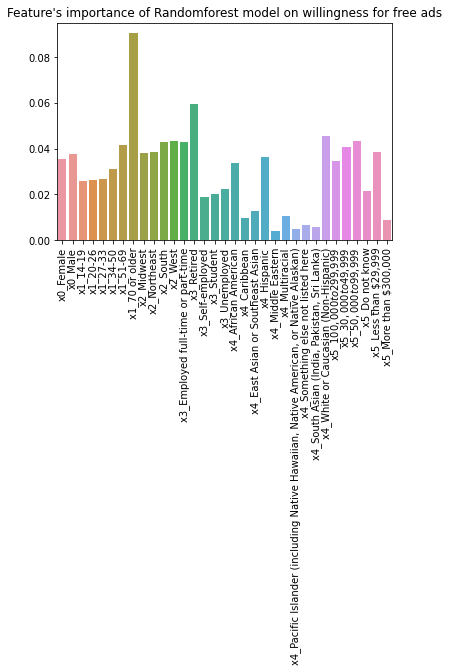

In [27]:
# display feature importance for decision tree model
_=sns.barplot(y=clf_rf.feature_importances_,x=ohe.get_feature_names())
_=plt.title("Feature's importance of Randomforest model on willingness for free ads")
_=plt.xticks(rotation=90)
plt.show()

* The features which indicate the elder people are too obvious for the model because the elder people are mostly not familiar with streaming service.

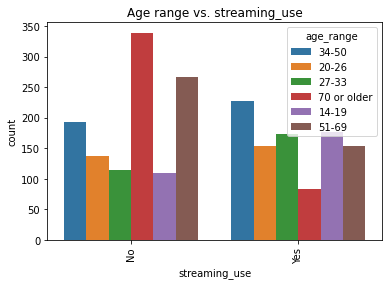

In [28]:
# Age range's streaming use Y/N records
_ = sns.countplot(x='streaming_use',\
                                            hue='age_range',data=df)
plt.title("Age range vs. streaming_use")
plt.xticks(rotation=90)
plt.show()

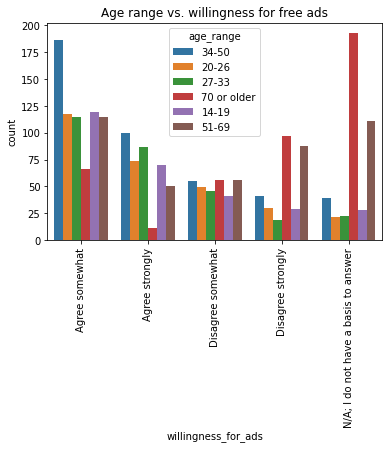

In [29]:
# Age range's willingness for free ads
_ = sns.countplot(x='willingness_for_ads',order=sorted(list(df['willingness_for_ads'].unique())),\
                                            hue='age_range',data=df)
plt.title("Age range vs. willingness for free ads")
plt.xticks(rotation=90)
plt.show()

### Decision Tree

In [30]:
def transformWillingness(x):
    if x== "Disagree strongly" or x== "Disagree somewhat":
        return "Likely to pay"
    else:
        return "Not likely to pay"  
y = df['willingness_for_ads'] 
y=y.apply(lambda x: transformWillingness(x))
y.value_counts()

Not likely to pay    1524
Likely to pay         607
Name: willingness_for_ads, dtype: int64

In [31]:
# after test the combination experiment, we select this position
X= df.loc[:,['gender','race','income']]

In [32]:
# split train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=10)

In [33]:
# apply onehot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False,handle_unknown="ignore")
X_train_prepared = ohe.fit_transform(X_train)
X_test_prepared = ohe.transform(X_test)


In [34]:
# cross validation
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
parameters = {'max_depth':range(3,10),
              'criterion':['gini','entropy'],
              'min_samples_leaf':range(30,100)
              }
clf = GridSearchCV(DecisionTreeClassifier(random_state=1,), parameters, n_jobs=4, )
clf.fit(X=X_train_prepared, y=y_train)
clf_tree_best = clf.best_estimator_
print("Best tree model parameters:\nbest score : {}\nModel parameter {}".format(clf.best_score_, clf.best_params_)) 

Best tree model parameters:
best score : 0.7109335368454132
Model parameter {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 30}


In [35]:
# adjust imbalanced sample case with sample weight adjustment
clf_tree_best.fit(X=X_train_prepared, y=y_train, sample_weight = np.array([2.5 if i == "Likely to pay" else 1 for i in y_train]))


DecisionTreeClassifier(max_depth=3, min_samples_leaf=30, random_state=1)

In [36]:
# show tree score
print("Entropy - Training set score: {:.3f}".format(clf_tree_best.score(X_train_prepared, y_train)))
print("Entropy - Test set score: {:.3f}".format(clf_tree_best.score(X_test_prepared, y_test)))

Entropy - Training set score: 0.581
Entropy - Test set score: 0.577


C:\Users\nangman\Anaconda3\envs\DFP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


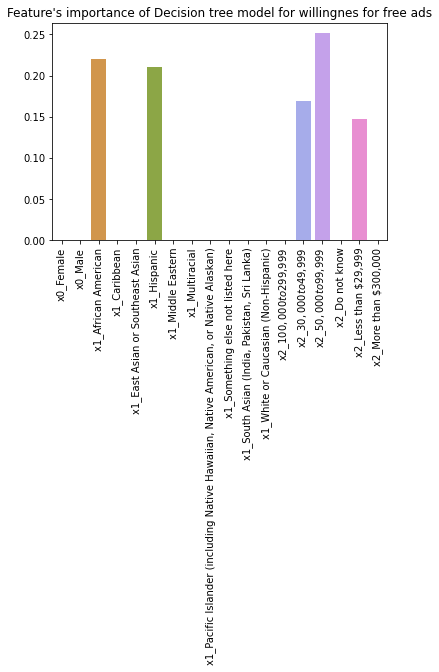

In [37]:
# display feature importance for decision tree model
_=sns.barplot(y=clf_tree_best.feature_importances_,x=ohe.get_feature_names())
_=plt.title("Feature's importance of Decision tree model for willingnes for free ads")
_=plt.xticks(rotation=90)
plt.show()

C:\Users\nangman\Anaconda3\envs\DFP\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


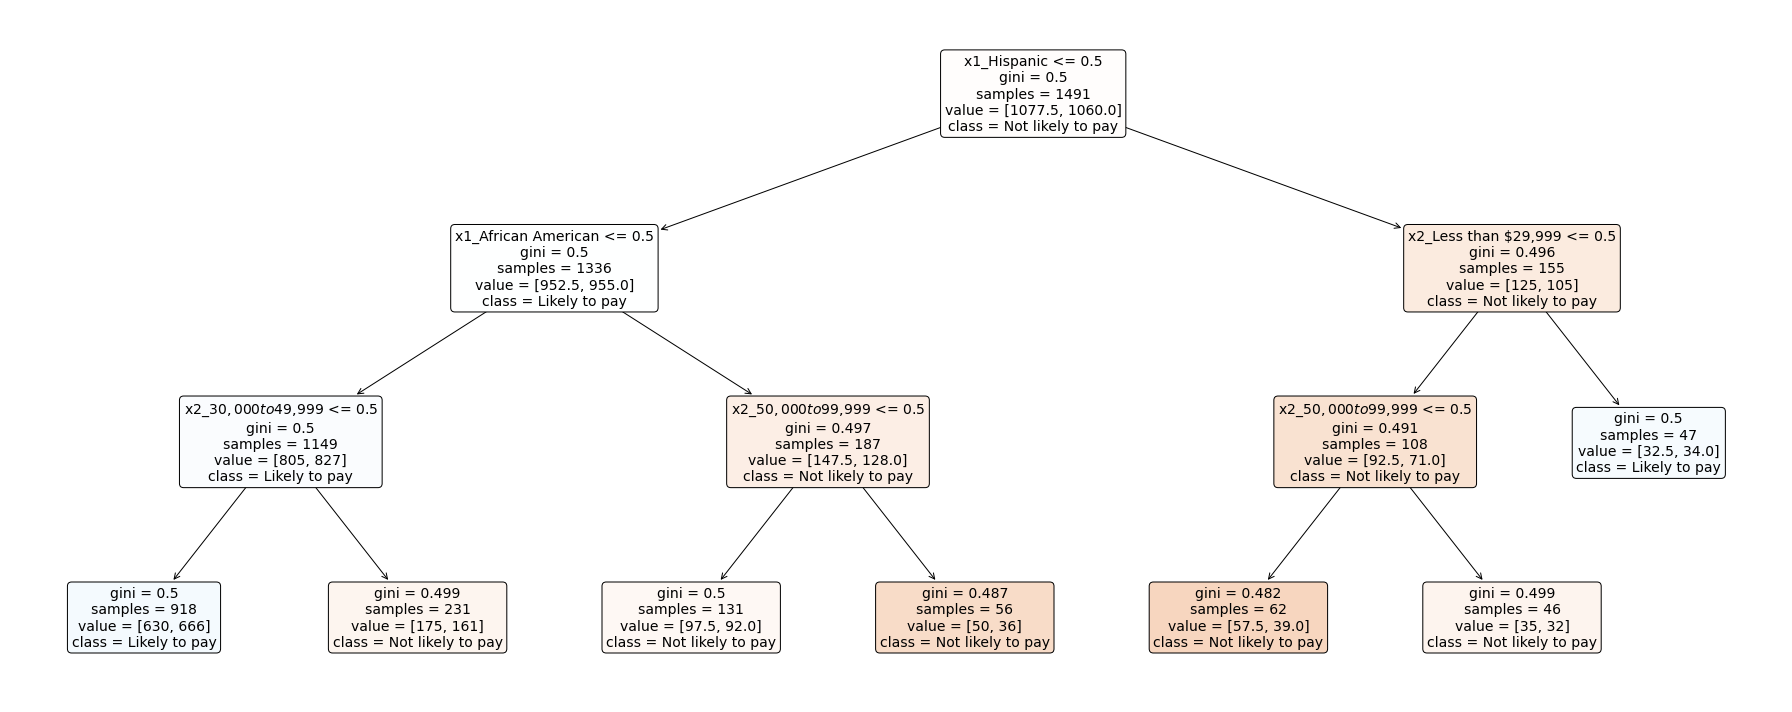

In [38]:
# draw the tree model
from sklearn.tree import plot_tree
plt.figure(figsize=(25,10))
_ = plot_tree(clf_tree_best, 
              class_names=list(y_train.unique()),
                feature_names = ohe.get_feature_names(),
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.tight_layout()
plt.show()

In [39]:
# check inportance
importances = pd.DataFrame(clf_tree_best.feature_importances_,ohe.get_feature_names()).sort_values(by=0,ascending=False).reset_index()
importances.columns = ['features','importance']
importances

,features,importance
0,"x2_$50,000 to $99,999",0.251822
1,x1_African American,0.220386
2,x1_Hispanic,0.210591
3,"x2_$30,000 to $49,999",0.169455
4,"x2_Less than $29,999",0.147747
5,x0_Female,0.000000
6,"x1_South Asian (India, Pakistan, Sri Lanka)",0.000000
7,x2_Do not know,0.000000
8,"x2_$100,000 to $299,999",0.000000
9,x1_White or Caucasian (Non-Hispanic),0.000000
